In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#parameter
a_c = 6.25             #台車駆動系のパラメータ
b_c = 4.36             #台車駆動系のパラメータ
m_p = 1.07 * 10 ** -1  #振り子の質量[kg]
l_p = 2.30 * 10 ** -1  #振り子の軸から重心までの長さ[m]
L_p = 3.80 * 10 ** -1  #振り子の全長[m]
J_p = 1.59 * 10 ** -3  #振り子の重心周りの慣性モーメント[kg m^2]
mu_p = 2.35 * 10 ** -4 #振り子の粘性摩擦係数 [kg m^2/s]
g = 9.81               #重力加速度[m/s^2]

In [3]:
'''
def Calculate_ddz(dz, v):
    formula1(a_c,dz,b_c,v)
    a_c 台車駆動系のパラメータ
    dz  移動変位
    b_c 台車駆動系のパラメータ
    v    制御入力
    
    A = torch.tensor([[0.0,1.0],[0.0,a_c]])
    b = torch.tensor([[0.0],[b_c]])
    x = torch.tensor([[z],[dz]])
    u = torch.tensor([[v]])
    y = torch.mm(A,x) + b * u

    #ddz = a_c * dz + b_c * v
    return y
'''

'\ndef Calculate_ddz(dz, v):\n    formula1(a_c,dz,b_c,v)\n    a_c 台車駆動系のパラメータ\n    dz  移動変位\n    b_c 台車駆動系のパラメータ\n    v    制御入力\n    \n    A = torch.tensor([[0.0,1.0],[0.0,a_c]])\n    b = torch.tensor([[0.0],[b_c]])\n    x = torch.tensor([[z],[dz]])\n    u = torch.tensor([[v]])\n    y = torch.mm(A,x) + b * u\n\n    #ddz = a_c * dz + b_c * v\n    return y\n'

In [14]:
y = Calculate_ddz(dz, v)
print(y)

-1.1351501263379722e+25


In [5]:
def Calculate_ddz(dz, v):
    ddz = a_c * dz + b_c * v
    return ddz

In [12]:
'''def formula2(q):
    m_p * l_p * np.cos(q) * ddz + (J_p + m_p * m_p**2) * ddq = -mu_p * dq + m_p * g * l_p * np.sin(q)
    return 0
'''
def Calculate_ddq(dq, q, ddz):
  return (-mu_p * dq + m_p * g * l_p * np.sin(q) - m_p * l_p * np.cos(q) * ddz)/((J_p + m_p * m_p**2))

In [9]:
#initial
q0 = np.pi
dq0 = 0
z0 = 0
dz0 = 0

In [10]:
def loss_cost(ddq,dq,q,ddz,dz):
    #10* dz**2 + 500*(-np.cos(q)+1)**2 + dz**2 + 15*dq**2
    return 20*dz*ddz + 1000*np.sin(q)*(-np.cos(q)+1) + 2*dz*ddz +30*dq*ddq

In [13]:
p = []
angle_p = []
input_s = []
h = 0.02  #width
t = np.arange(0,10,h)

#variable
q = q0     #angle
dq = dq0  #angular velocity
z = z0    #position
dz = dz0  #velocity

for _ in t:
  v=np.random.uniform(-1,1) #External input
  input_s.append(v)
  ddz = Calculate_ddz(dz,v)
  dz += ddz * h
  z += dz * h
  p.append(z)
  #print(z)
  #print(ddz)
  ddq = Calculate_ddq(dz,dq,q)
  dq += ddq * h
  q += dq * h
  angle_p.append(q)
  #print(ddq)

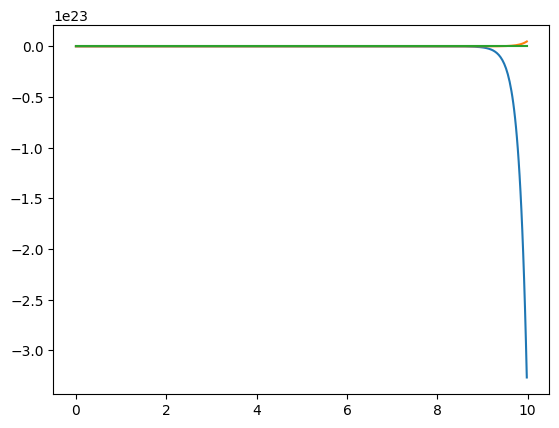

In [15]:
plt.plot(t,p)
plt.plot(t,angle_p)
plt.plot(t,input_s)
plt.show()